<a href="https://colab.research.google.com/github/DeuklyoungKo/TensorFlowBasicWithPython/blob/main/tensorflow/03_Keras_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.8.2


In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print("훈련 샘플: {}, 레이블: {}".format(len(train_data), len(train_labels)))

훈련 샘플: 25000, 레이블: 25000


In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [6]:
# 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [7]:
# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [9]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [11]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [12]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [13]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [14]:
# 입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기입니다(10,000개의 단어)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 24ms/step - loss: 0.6922 - accuracy: 0.5523 - val_loss: 0.6906 - val_accuracy: 0.5927
Epoch 2/40
30/30 [==============================] - 0s 16ms/step - loss: 0.6874 - accuracy: 0.7010 - val_loss: 0.6840 - val_accuracy: 0.7282
Epoch 3/40
30/30 [==============================] - 1s 17ms/step - loss: 0.6775 - accuracy: 0.7512 - val_loss: 0.6715 - val_accuracy: 0.7486
Epoch 4/40
30/30 [==============================] - 0s 16ms/step - loss: 0.6599 - accuracy: 0.7700 - val_loss: 0.6511 - val_accuracy: 0.7587
Epoch 5/40
30/30 [==============================] - 0s 16ms/step - loss: 0.6324 - accuracy: 0.7849 - val_loss: 0.6212 - val_accuracy: 0.7679
Epoch 6/40
30/30 [==============================] - 0s 16ms/step - loss: 0.5959 - accuracy: 0.7997 - val_loss: 0.5843 - val_accuracy: 0.7910
Epoch 7/40
30/30 [==============================] - 1s 17ms/step - loss: 0.5530 - accuracy: 0.8177 - val_loss: 0.5444 - val_accuracy: 0.8088
Epoch 8/40
30

In [19]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

782/782 - 1s - loss: 0.3209 - accuracy: 0.8727 - 1s/epoch - 1ms/step
[0.3209283649921417, 0.8726800084114075]


In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 17ms/step - loss: 0.1031 - accuracy: 0.9717 - val_loss: 0.3026 - val_accuracy: 0.8842
Epoch 2/40
30/30 [==============================] - 0s 15ms/step - loss: 0.0991 - accuracy: 0.9738 - val_loss: 0.3053 - val_accuracy: 0.8837
Epoch 3/40
30/30 [==============================] - 0s 16ms/step - loss: 0.0960 - accuracy: 0.9745 - val_loss: 0.3088 - val_accuracy: 0.8823
Epoch 4/40
30/30 [==============================] - 0s 15ms/step - loss: 0.0927 - accuracy: 0.9753 - val_loss: 0.3112 - val_accuracy: 0.8817
Epoch 5/40
30/30 [==============================] - 1s 19ms/step - loss: 0.0892 - accuracy: 0.9774 - val_loss: 0.3136 - val_accuracy: 0.8826
Epoch 6/40
30/30 [==============================] - 1s 18ms/step - loss: 0.0862 - accuracy: 0.9782 - val_loss: 0.3169 - val_accuracy: 0.8814
Epoch 7/40
30/30 [==============================] - 1s 18ms/step - loss: 0.0833 - accuracy: 0.9792 - val_loss: 0.3200 - val_accuracy: 0.8816
Epoch 8/40
30

In [23]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

782/782 - 1s - loss: 0.5018 - accuracy: 0.8571 - 1s/epoch - 1ms/step
[0.5017902851104736, 0.8570799827575684]


In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

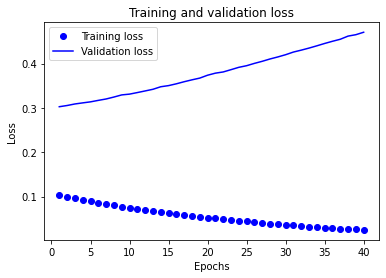

In [30]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

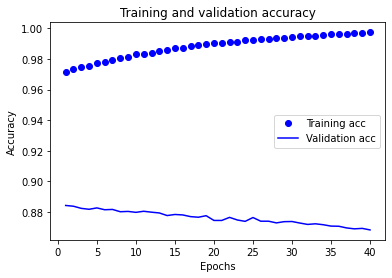

In [31]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [38]:
[x_val[0]]

[array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
        4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
         838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
           4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
        1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
         147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
          71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
           4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
          62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
          16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
           5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
          22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
           2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
        3766,    5,  723,   36,   71, 

In [39]:
x_val

array([[   1,   14,   22, ...,    0,    0,    0],
       [   1,  194, 1153, ...,    0,    0,    0],
       [   1,   14,   47, ...,    0,    0,    0],
       ...,
       [   1,   14,    9, ...,    0,    0,    0],
       [   1,   14,   20, ...,    0,    0,    0],
       [   1,   51,  527, ...,    0,    0,    0]], dtype=int32)

In [47]:
x_val[0].reshape(1,256)

array([[   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
        4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
         838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
           4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
        1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
         147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
          71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
           4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
          62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
          16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
           5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
          22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
           2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
        3766,    5,  723,   36,   71, 

In [71]:
result = model.predict(x_val[1].reshape(1,256))
result[0][0].round(2)

0.0

In [69]:
model.predict(x_val)[1][0].round(2)


0.0

In [54]:
y_val[1]

0